<a href="https://colab.research.google.com/github/esraozyavuz/mini_project/blob/main/EsraOzyavuz_miniproject_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel("/content/drive/MyDrive/PZ_segmentasyon.xlsx")
df.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cinsiyet               182 non-null    object        
 1   yas                    174 non-null    float64       
 2   il                     187 non-null    object        
 3   semt                   187 non-null    object        
 4   uyelik_tarihi          187 non-null    datetime64[ns]
 5   ilk_satın_alma         187 non-null    datetime64[ns]
 6   son_satın_alma         187 non-null    datetime64[ns]
 7   sipariş_adedi          187 non-null    int64         
 8   toplam_harcama         187 non-null    float64       
 9   toplam_indirim_tutarı  187 non-null    int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 14.7+ KB


Task-7A: Please calculate the average order value (AOV) by dividing the total amount spent (“toplam harcama”) by total order (“sipariş adedi”) per user and put these values to a new column.

In [10]:
df["ortalama_siparis_degeri"] = df["toplam_harcama"] / df["sipariş_adedi"]

Task-7B: Please calculate the duration from the membership date (“üyelik tarihi) until the current date (suppose that the current date is May 2, 2023). Then present these values in a new column with the name total life time. Please also visualize them via the use of hist (histogram) function.

In [11]:
import datetime as dt
current_date = dt.datetime(2023, 5, 2)

In [12]:
df["toplam_yasam_suresi"] = ((current_date - df["uyelik_tarihi"]).astype("timedelta64[D]"))

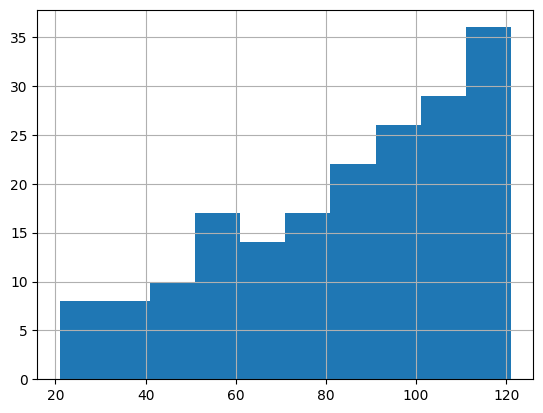

In [13]:
df["toplam_yasam_suresi"] = ((current_date - df["uyelik_tarihi"]).astype("timedelta64[D]")).hist()

Task-7C: Please calculate the duration (in days) from the last purchase/order date until the current date (suppose that the current date is May 2, 2023) and add this into the dataset as “Recency” column. Please also visualize them via the use of hist (histogram) function.


In [14]:
df["Recency"] = (current_date - df["son_satın_alma"]).dt.days

<Axes: >

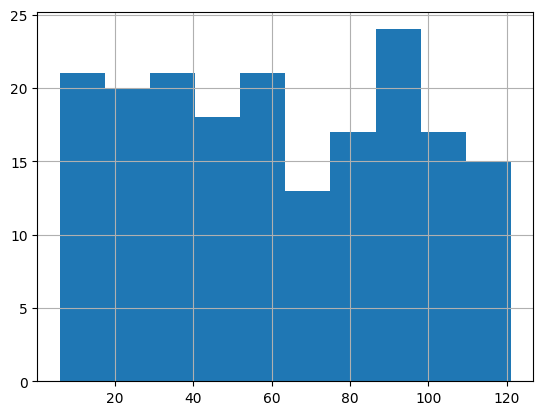

In [15]:
df["Recency"].hist()

Task-7D: Please calculate the duration between the membership date and the first order date to understand if there is a lag in the first order. Please also visualize them via the use of hist (histogram) function.

In [16]:
df["duration"] = (df["ilk_satın_alma"] - df["uyelik_tarihi"]).dt.days

<Axes: >

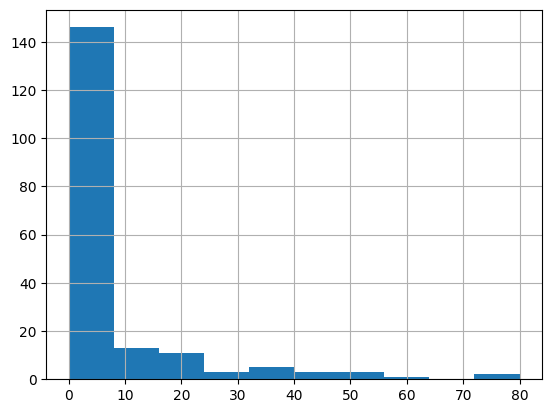

In [17]:
df["duration"].hist()

Task-7E: Please prepare 4 segments with respect to users’ ages that shall be equal in size (quartile). Then prepare a table (pivot table) that will summarize the average order values with respect to each age segment. (Hint: remember that we have covered a similar task in the titanic dataset with the use of qcut and cut functions). Please also visualize them via the use of plot function (kind=”bar”).


In [18]:
df["yas"].min()
df["yas"].max()

78.0

In [19]:
age_range = pd.cut(df["yas"], [10, 18, 35, 50, 80])
df.pivot_table("ortalama_siparis_degeri", [age_range])

,ortalama_siparis_degeri
yas,
"(10, 18]",77.500000
"(18, 35]",137.550367
"(35, 50]",235.614024
"(50, 80]",237.719462


<Axes: xlabel='yas'>

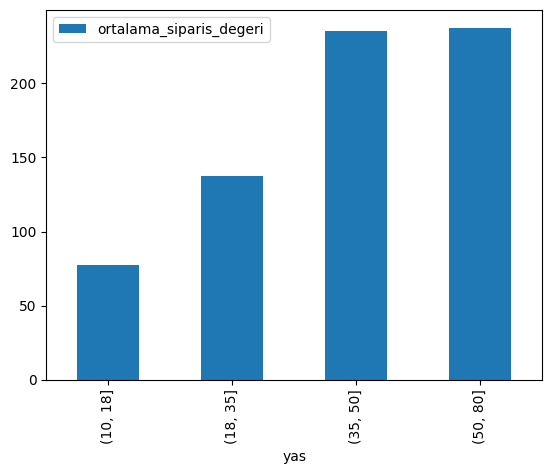

In [20]:
df.pivot_table("ortalama_siparis_degeri", [age_range]).plot.bar()

Task-7F: Please prepare a new table with segmented ages but this time please introduce gender as a new dimension into this table. Moreover, please also show the count values in another pivot table. Please also visualize them via the use of plot function (kind=bar).


In [21]:
df.pivot_table("ortalama_siparis_degeri", ["cinsiyet", age_range])

ortalama_siparis_degeri
cinsiyet yas                              
Erkek    (10, 18]                77.500000
         (18, 35]               113.271042
         (35, 50]               148.020833
         (50, 80]               202.869048
Kadın    (18, 35]               146.457339
         (35, 50]               263.417350
         (50, 80]               207.543399

In [22]:
df.pivot_table("ortalama_siparis_degeri", ["cinsiyet", age_range], aggfunc="count")

ortalama_siparis_degeri
cinsiyet yas                              
Erkek    (10, 18]                        2
         (18, 35]                       24
         (35, 50]                       12
         (50, 80]                        7
Kadın    (10, 18]                        0
         (18, 35]                       53
         (35, 50]                       44
         (50, 80]                       26

<Axes: xlabel='cinsiyet,yas'>

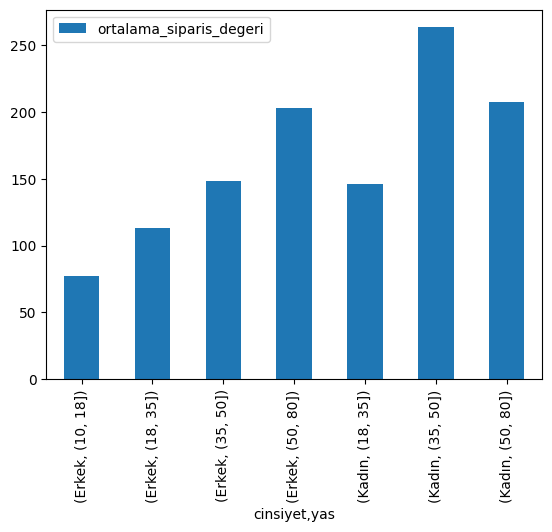

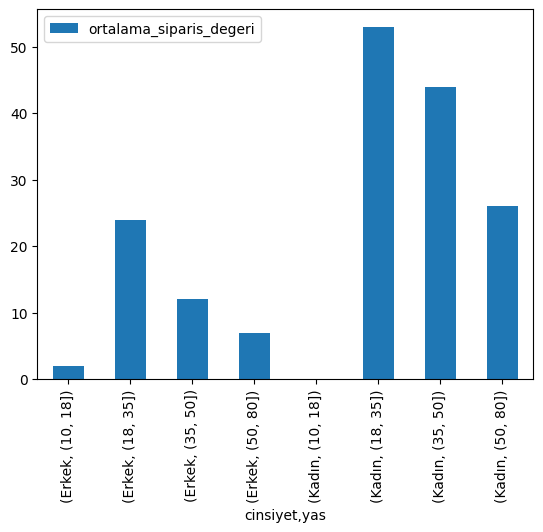

In [23]:
df.pivot_table("ortalama_siparis_degeri", ["cinsiyet", age_range]).plot.bar()
df.pivot_table("ortalama_siparis_degeri", ["cinsiyet", age_range], aggfunc="count").plot.bar()

Task-7G: Please analyze the order counts with respect to different districts (“semt”) to demonstrate that this application is used in which districts more than the other districts. Else, please try to provide 3-4 segments with respect to these districts that are more abundant in orders and customers just like VIP districts etc. Please also visualize them via the use of plot function.




In [24]:
df.groupby('semt')['sipariş_adedi'].count()

semt
ATAŞEHİR         14
BAHÇELİEVLER      4
BAKIRKÖY          4
BAYRAMPAŞA        1
BAĞCILAR          3
BAŞAKŞEHİR        8
BEYKOZ            5
BEYOĞLU           2
BEŞİKTAŞ         16
BÜYÜKÇEKMECE      2
ESENLER           1
ESENYURT          7
EYÜPSULTAN        5
GAZİOSMANPAŞA     1
KADIKÖY          19
KARTAL           14
KAĞITHANE         9
KÜÇÜKÇEKMECE      2
MALTEPE          12
NİLÜFER           1
PENDİK            6
SANCAKTEPE        7
SARIYER          16
SULTANGAZİ        1
TUZLA             1
ZEYTİNBURNU       2
ÇEKMEKÖY          1
ÜMRANİYE          7
ÜSKÜDAR           8
ŞİŞLİ             8
Name: sipariş_adedi, dtype: int64

In [25]:
df["segments"] = pd.cut(df["sipariş_adedi"], bins=4, labels=["Churn Customer", "Rare Customer", "Medium Customer", "VIP Customer"])

In [26]:
df.pivot_table("sipariş_adedi", ["semt", "segments"], aggfunc="count")

sipariş_adedi
semt         segments                      
ATAŞEHİR     Churn Customer              13
             Rare Customer                1
             Medium Customer              0
             VIP Customer                 0
BAHÇELİEVLER Churn Customer               4
...                                     ...
ÜSKÜDAR      VIP Customer                 0
ŞİŞLİ        Churn Customer               7
             Rare Customer                1
             Medium Customer              0
             VIP Customer                 0

[120 rows x 1 columns]

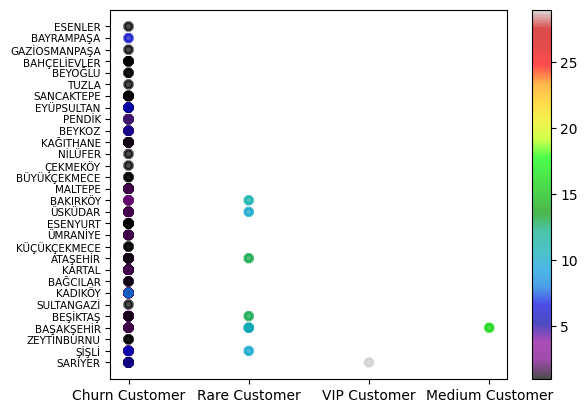

In [27]:
plt.scatter(df["segments"], df["semt"], c=df["sipariş_adedi"], s=35, linewidths=2.0, marker="8", alpha=0.7, cmap="nipy_spectral")
plt.colorbar()
plt.yticks(color="black", size=7.5)
plt.show()

Task-7H: Please provide a visualization via the scatter plot function to illustrate the customers/users with respect to different derived dimensions (please include the size and color metrics to enrichen the outputs).

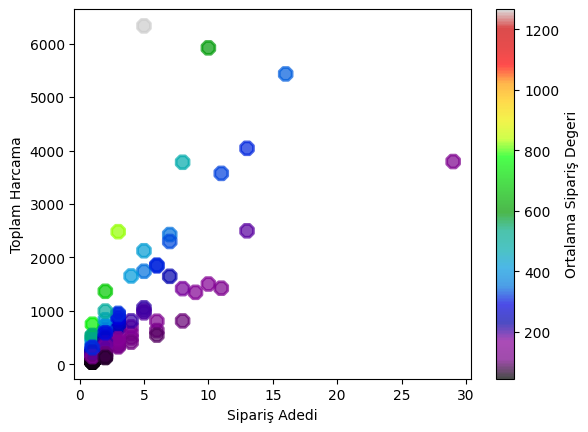

In [28]:
plt.scatter(df["sipariş_adedi"], df["toplam_harcama"], c=df["ortalama_siparis_degeri"], s=100, linewidths=2.0, marker="8", alpha=0.7, cmap="nipy_spectral")
plt.colorbar(label="Ortalama Sipariş Degeri")
plt.xlabel("Sipariş Adedi")
plt.ylabel("Toplam Harcama")
plt.show()

<ipython-input-29-f584a1c9657e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["yas"], df["ortalama_siparis_degeri"], s=100, linewidths=2.0, marker="8", alpha=0.7, cmap="viridis")


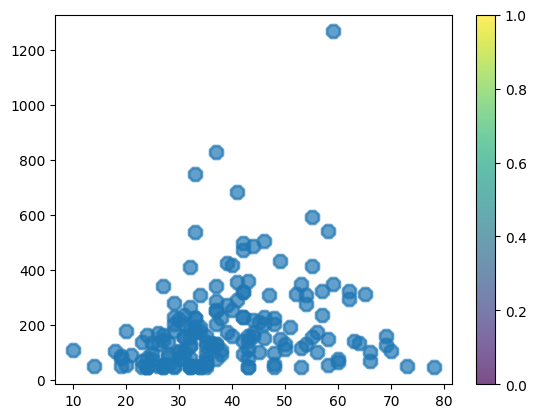

In [29]:
plt.scatter(df["yas"], df["ortalama_siparis_degeri"], s=100, linewidths=2.0, marker="8", alpha=0.7, cmap="viridis")
plt.colorbar()
plt.show()